In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Training  the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**



Import the data set and print 10 random rows from the data set

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mtb
colomns = 'sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class'
iris = pd.read_csv('iris.data',names = colomns)
iris.sample(n=10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
118,7.7,2.6,6.9,2.3,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa


## Data Pre-processing

 Estimating missing values
- we will have to see how to replace those missing values with some estimated values (median) *

In [0]:
iris.isnull()
#There are no null values from the datast imported.Hence no need to replace anything

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


categorical data treatment


In [0]:
#transform the categorica into numerial using label encoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['class'] = lb_make.fit_transform(iris['class'])
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
iris.corr()
#all the variables have a good corelation hence not dropping any colomn

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
iris.var()

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
class                 0.671141
dtype: float64

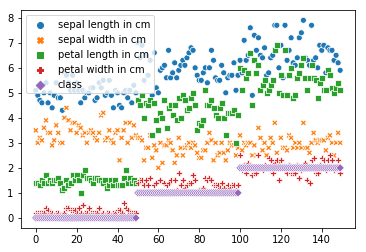

In [0]:
#scatter plot 
sns.scatterplot(data = iris)

In [0]:
#split the dataset into training and test sets with 80-20 ratio
from sklearn.model_selection import train_test_split


X=iris.iloc[:,0:3]
y = iris['class']
#Split the test and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#apply knn algorithm for different values of k
k_list=[3,5,9]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    #fit the data
    knn.fit(X_train,y_train)
    #print the score
    y_pred = knn.predict(X_test)
    print("\n Metrics score : ",metrics.accuracy_score(y_test,y_pred))


 Metrics score :  0.9333333333333333

 Metrics score :  0.9

 Metrics score :  0.9333333333333333


In [0]:
#use MSE as a measure
scores=[];
neighbor=range(1,20,2);
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#apply knn algorithm for different values of k

for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    #fit the data
    knn.fit(X_train,y_train)
    #print the score
    y_pred = knn.predict(X_test)
    
    scores.append(1-metrics.accuracy_score(y_test,y_pred))
print(scores)
MSE = neighbor[scores.index(min(scores))]
print("The misclassification error is minimum for ",MSE)

[0.09999999999999998, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.033333333333333326]
The misclassification error is minimum for  19


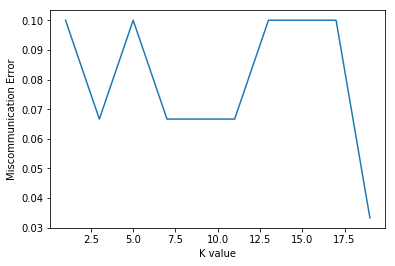

In [0]:
import matplotlib.pyplot as plt
plt.plot(neighbor,scores)
plt.ylabel('Miscommunication Error')
plt.xlabel('K value')
plt.show()

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [0]:
X=iris.iloc[:,0:3]
y = iris['class']
#species colomn is named as class name

In [0]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32
     sepal length in cm  sepal width in cm  petal length in cm
0                   5.1                3.5                 1.4
1                   4.9                3.0                 1.4
2                   4.7                3.2                 1.3
3                   4.6                3.1                 1.5
4                   5.0                3.6                 1.4
5                   5.4           

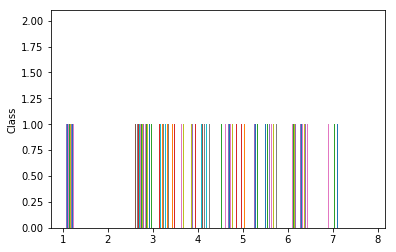

In [0]:
#distribution of target variable using histogram
plt.hist(X)
plt.ylabel('Class')
plt.show()

In [0]:
#Drop Id variable from data

In [0]:
iris.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
#Split the test and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
seed = 7

model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [0]:
#Predict
expected = y_test
predicted = model.predict(X_test)


In [0]:
# show Confusion Matrix
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]


# Using SVM with Diebetes Dataset